# Contraste de una imágen

# Ejercicio 4


Si usamos la función de Octave debemos notar que 63/255 = 0,247, de manera que en una
imagen normalizada tendremos
I=imread(‘cerebro1.tif’);
imshow(I);
J=imadjust(I,[0 0.247],[ ]);
¿Qué ocurre si en vez de trabajar con 0.247 se decide trabajar con 0.5?

(326, 325)


C:\Users\SARA\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\SARA\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


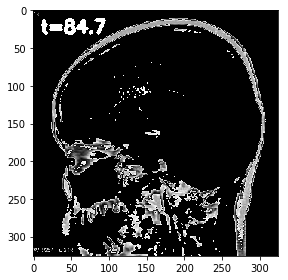

In [2]:
import numpy as np
import bisect
import matplotlib.pyplot as plt
import cv2
from skimage import io

    # src : input one-layer image (numpy array)
    # tol : tolerance, from 0 to 100.
    # vin  : src image bounds
    # vout : dst image bounds
t = 84.7    
src = io.imread('Imagenes_Pruebas/cerebro_gr.JPG')
print(src.shape)
dst = src.copy()
tol = max(0, min(100, t))
vin=[0,255]
vout=(0,255)

if tol > 0:
        # Compute in and out limits
        # Histogram
    hist = np.zeros(256, dtype=np.float)
    for r in range(src.shape[0]):
        for c in range(src.shape[1]):
            hist[src[r,c]] += 1
        # Cumulative histogram
    cum = hist.copy()
    for i in range(1, len(hist)):
        cum[i] = cum[i - 1] + hist[i]

        # Compute bounds
    total = src.shape[0] * src.shape[1]
    low_bound = total * tol / 100
    upp_bound = total * (100 - tol) / 100
    vin[0] = bisect.bisect_left(cum, low_bound)
    vin[1] = bisect.bisect_left(cum, upp_bound)

    # Stretching
scale = (vout[1] - vout[0]) / (vin[1] - vin[0])
for r in range(dst.shape[0]):
    for c in range(dst.shape[1]):
        vs = max(src[r,c] - vin[0], 0)
        vd = min(int(vs * scale + 0.5) + vout[0], vout[1])
        dst[r,c] = vd
cv2.putText(dst, "t={}".format(t), (10, 30),cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 3)
io.imshow(dst)

In [88]:
#IMAGEN NORMALIZADA NO FUNCIONA POR LOS CICLOS FOR 
import numpy as np
import bisect
import matplotlib.pyplot as plt
from skimage import io
import cv2

    # src : input one-layer image (numpy array)
    # tol : tolerance, from 0 to 100.
    # vin  : src image bounds
    # vout : dst image bounds
t = 24.7    
I = io.imread('cerebro_gr.JPG') 
src = cv2.normalize(I.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX)
print(src.shape)
dst = src.copy()
tol = max(0, min(100, t))
vin=[0,255]
vout=(0,255)

if tol > 0:
        # Compute in and out limits
        # Histogram
    hist = np.zeros(256, dtype=np.float)
    for r in range(src.shape[0]):
        for c in range(src.shape[1]):
            hist[src[r,c]] += 1
        # Cumulative histogram
    cum = hist.copy()
    for i in range(1, len(hist)):
        cum[i] = cum[i - 1] + hist[i]

        # Compute bounds
    total = src.shape[0] * src.shape[1]
    low_bound = total * tol / 100
    upp_bound = total * (100 - tol) / 100
    vin[0] = bisect.bisect_left(cum, low_bound)
    vin[1] = bisect.bisect_left(cum, upp_bound)

    # Stretching
scale = (vout[1] - vout[0]) / (vin[1] - vin[0])
for r in range(dst.shape[0]):
    for c in range(dst.shape[1]):
        vs = max(src[r,c] - vin[0], 0)
        vd = min(int(vs * scale + 0.5) + vout[0], vout[1])
        dst[r,c] = vd
cv2.putText(dst, "t={}".format(t), (10, 30),cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 3)
io.imshow(dst)

(326, 325)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices